<h1>Author Sapnil Patel</h1>

<h3>Drowsiness Detection using yoloV5.</h3>

<h2>1. Install and Import Dependencies</h2>

In [4]:
#Import pytorch
!pip3 install torch torchvision torchaudio

  Using cached torch-2.0.1-cp39-cp39-win_amd64.whl (172.4 MB)
  Using cached torchvision-0.15.2-cp39-cp39-win_amd64.whl (1.2 MB)
  Using cached torchaudio-2.0.2-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [3]:
#cloning the yolov5 repo
!git clone https://github.com/ultralytics/yolov5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.7.1 requires pyparsing>=2.3.1, which is not installed.


     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     -------------------------------------- 0.0/172.4 MB 640.0 kB/s eta 0:04:30
     -------------------------------------- 0.0/172.4 MB 640.0 kB/s eta 0:04:30
     -------------------------------------- 0.1/172.4 MB 409.6 kB/s eta 0:07:01
     -------------------------------------- 0.1/172.4 MB 652.2 kB/s eta 0:04:25
     -------------------------------------- 0.1/172.4 MB 652.2 kB/s eta 0:04:25
     -------------------------------------- 0.1/172.4 MB 532.5 kB/s eta 0:05:24
     -------------------------------------- 0.2/172.4 MB 581.0 kB/s eta 0:04:57
     -------------------------------------- 0.2/172.4 MB 581.0 kB/s eta 0:04:57
     -------------------------------------- 0.2/172.4 MB 452.9 kB/s eta 0:06:21
     -------------------------------------- 0.2/172.4 MB 533.8 kB/s eta 0:05:23
     -------------------------------------- 0.3/172.4 MB 532.5 kB/s eta 0:05:24
     -------------------------------------- 0.3

Cloning into 'yolov5'...


In [7]:
!cd yolov5 & pip install -r requirements.txt

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     ---------------------------------------- 0.0/611.7 kB ? eta -:--:--
      --------------------------------------- 10.2/611.7 kB ? eta -:--:--
      --------------------------------------- 10.2/611.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/611.7 kB 187.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/611.7 kB 187.9 kB/s eta 0:00:04
     -- ---------------------------------- 41.0/611.7 kB 164.3 kB/s eta 0:00:04
     --- --------------------------------- 61.4/611.7 kB 204.8 kB/s eta 0:00:03
     --- --------------------------------- 61.4/611.7 kB 204.8 kB/s eta 0:00:03
     --- --------------------------------- 61.4/611.7 kB 204.8 kB/s eta 0:00:03
     ------ ----------------------------- 112.6/611.7 kB 273.1 kB/s eta 0:00:02
     --------- --------------

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

<h2>2.Load Model</h2>

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\SAPNIL/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-23 Python-3.9.16 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [11]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

<h2>3.Make Detections</h2>

In [3]:
#Just trying our model on random image
img = 'https://images.unsplash.com/photo-1564906158598-041131af6a04?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8dHJhZmZpYyUyMGphbXN8ZW58MHx8MHx8&w=1000&q=80'

In [4]:
results = model(img)
results.print()

image 1/1: 666x1000 3 persons, 24 cars, 8 buss, 2 trucks
Speed: 2062.3ms pre-process, 539.7ms inference, 27.0ms NMS per image at shape (1, 3, 448, 640)


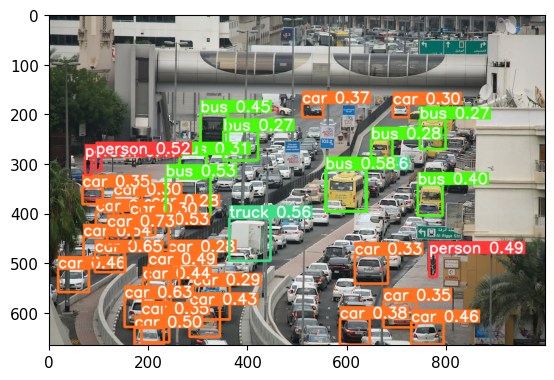

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
results.render()

[array([[[ 25,  30,  36],
         [ 25,  30,  36],
         [ 27,  32,  36],
         ...,
         [ 67,  68,  60],
         [ 73,  73,  65],
         [ 67,  67,  59]],
 
        [[ 25,  30,  36],
         [ 25,  30,  36],
         [ 27,  32,  36],
         ...,
         [ 95,  96,  88],
         [104, 104,  96],
         [104, 104,  96]],
 
        [[ 24,  31,  37],
         [ 24,  31,  37],
         [ 25,  33,  36],
         ...,
         [130, 129, 124],
         [139, 136, 129],
         [138, 135, 128]],
 
        ...,
 
        [[159, 157, 142],
         [159, 157, 142],
         [159, 157, 142],
         ...,
         [ 63,  64,  56],
         [ 63,  64,  56],
         [ 63,  66,  57]],
 
        [[161, 159, 144],
         [161, 159, 144],
         [161, 159, 144],
         ...,
         [ 47,  47,  39],
         [ 47,  47,  39],
         [ 46,  47,  39]],
 
        [[161, 159, 144],
         [161, 159, 144],
         [161, 159, 144],
         ...,
         [ 76,  73,  66],
  

<h2>4.Real Time Detections</h2>

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<h2>5.Train from Scratch</h2>

In [10]:
import uuid   # Unique identifier
import os
import time

In [18]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [19]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [10]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.39b9e0d0-f915-11ed-b678-d8c0a69c1bc9.jpg


In [11]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname) 

data\images\awake.3cb49c48-f915-11ed-bf63-d8c0a69c1bc9.jpg
data\images\awake.3cb49c49-f915-11ed-9018-d8c0a69c1bc9.jpg
data\images\awake.3cb49c4a-f915-11ed-8b44-d8c0a69c1bc9.jpg
data\images\awake.3cb49c4b-f915-11ed-930a-d8c0a69c1bc9.jpg
data\images\awake.3cb49c4c-f915-11ed-8174-d8c0a69c1bc9.jpg
data\images\awake.3cb49c4d-f915-11ed-adfc-d8c0a69c1bc9.jpg
data\images\awake.3cb49c4e-f915-11ed-adf2-d8c0a69c1bc9.jpg
data\images\awake.3cb49c4f-f915-11ed-a363-d8c0a69c1bc9.jpg
data\images\awake.3cb49c50-f915-11ed-a826-d8c0a69c1bc9.jpg
data\images\awake.3cb49c51-f915-11ed-b5ce-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c52-f915-11ed-bf81-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c53-f915-11ed-aaa0-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c54-f915-11ed-a492-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c55-f915-11ed-b104-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c56-f915-11ed-8fd7-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c57-f915-11ed-9a67-d8c0a69c1bc9.jpg
data\images\drowsy.3cb49c58-f915-11ed-b3f4-d8c0a69

In [16]:
!git clone https://github.com/heartexlabs/labelImg

Cloning into 'labelImg'...


In [19]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.8 MB 187.9 kB/s eta 0:00:37
     ---------------------------------------- 0.0/6.8 MB 187.9 kB/s eta 0:00:37
     ---------------------------------------- 0.1/6.8 MB 302.7 kB/s eta 0:00:23
     ---------------------------------------- 0.1/6.8 MB 302.7 kB/s eta 0:00:23
     - -------------------------------------- 0.2/6.8 MB 655.6 kB/s eta 0:00:11
     - -------------------------------------- 0.2/6.8 MB 655.6 kB/s eta 0:00:11
     -- ------------------------------------- 0.4/6.8 MB 851.3 kB/s eta 0:00:08
     -- ------------------------------------- 0.5/6.8 MB 994.6 kB/s eta 0:00:07
     --- ------------------------------------ 0.5/6.8 MB 1.1 MB/s eta 0:00:06
     --- ------------------------------------ 0.6/6.8 MB 1.1 MB/s eta

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 350 --data dataset.yml --weights yolov5s.pt --workers 2

<h2>6.Load Custom model</h2>

In [8]:
 model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\SAPNIL/.cache\torch\hub\master.zip
YOLOv5  2023-6-21 Python-3.9.16 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'drowsy.ebf5606a-f8a0-11ed-9041-d8c0a69c1bc9.jpg')

In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 12.0ms pre-process, 602.8ms inference, 5.0ms NMS per image at shape (1, 3, 480, 640)


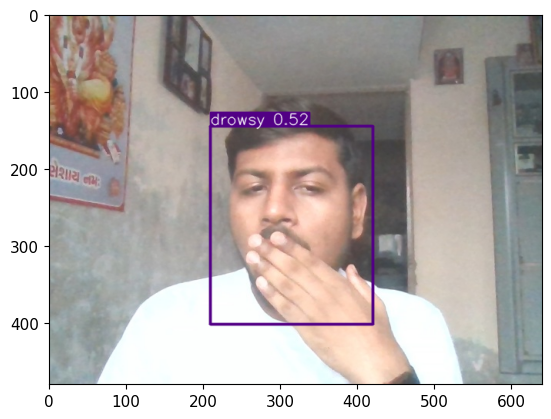

In [15]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()